<a href="https://www.kaggle.com/code/sondosaabed/investigatimg-demographics-and-housing-permits?scriptVersionId=184786818" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Investigating NICS and Census Datasets

## Abstract
In this report, a data analysis process is conducted on the NICS and Census Datasets. The process is performed in a structured manner where two main questions are considered: how some demographic factors contributes to the total numbers of gun permits issued, and what is the impact of housing and building permits on the total number of gun purchases, That is in diffrent states in teh year of 2016. In order to investigate and answer these questions: first of all the data is loaded into pandas dataframes, then an intial exploration is conducted, the next phase was assessing the data quality: that included multiple aspects such as: Detection of missing values, detection of duplicated values, detection of outliers and fiannly inconsistentny between the datsets. Now that the assessment is done, the datasets go through a cleaning process based on the assessment done, including handling the following: missing values, duplicated values, outliers and merging the datasets with fixing any inconsistentcies. Then, the exploratory data analysis (EDA) is done in order to answer the questions proposed, where that included visualizations too. Finally, the conclusions are made and presented to the reader and teh report is extracted into an html document.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a>
    <ul>
        <li>Dataset Description</li>
        <li>Questions for analysis</li>
    </ul>
</li>
<li><a href="#wrangling">Data Wrangling</a>
    <ul>
        <li><strong>Loading the datasets</strong></li>
        <li><strong>Initial exploration</strong></li>
        <li><strong>Data assessment</strong>
            <ul>
                <li>Detecting Missing values</li>
                <li>Detecting Duplicated values</li>
                <li>Detecting Outliers</li>
                <li>Detecting Inconsistencies</li>
            </ul>
        </li>
        <li><strong>Data cleaning</strong>
             <ul>
                <li>Handling Inconsistencies</li>
                <li>Handling Missing values</li>
                <li>Handling Duplicated values</li>
                <li>Handling Outliers</li>
            </ul>   
        </li>    
    </ul>
</li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><strong>Question 1:</strong> Demographic Factors Vs. Total gun permits issued</li>
        <li><strong>Question 2:</strong> Housing, building permits Vs. Total gun permits issued</li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Even though the writer of this notebook is located far from the United States, they are acutely aware of the intense discussions surrounding gun ownership and regulation there. 

In this report, two datsets goes through the analysis pipeline, where the writer is addressing two main questions about the matter of gun ownership and the factors of the united states specifically in the year of 2016 (given that the available data is collected in that timeline)

### Dataset Description 

The dataset used in this analysis comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

- **The NICS data:** is found in .csv file. It contains the number of firearm checks by month, state, and type.
The following table shows the details for each column in the dataset.

**Table 1:** Columns of NICS data with describtion.

| Column Name | Description |
|---|---|
| month | The month the data applies to. |
| state | The state where the data was collected. |
| permit | Number of permits issued. |
| permit_recheck | Number of permit rechecks conducted. |
| handgun | Number of handgun transactions (could be permit applications, purchases, etc.). |
| long_gun | Number of long gun transactions (could be permit applications, purchases, etc.). |
| other | Number of other firearm transactions (could be permit applications, purchases, etc.). |
| multiple | Number of transactions involving multiple firearm types. |
| admin | Number of administrative transactions (could be background checks, license renewals, etc.). |
| prepawn_handgun | Number of handguns pre-pawned. |
| prepawn_long_gun | Number of long guns pre-pawned. |
| prepawn_other | Number of other firearms pre-pawned. |
| redemption_handgun | Number of handguns redeemed from pawn. |
| redemption_long_gun | Number of long guns redeemed from pawn. |
| redemption_other | Number of other firearms redeemed from pawn. |
| returned_handgun | Number of handguns returned to seller. |
| returned_long_gun | Number of long guns returned to seller. |
| returned_other | Number of other firearms returned to seller. |
| rentals_handgun | Number of handgun rentals. |
| rentals_long_gun | Number of long gun rentals. |
| private_sale_handgun | Number of handguns sold privately. |
| private_sale_long_gun | Number of long guns sold privately. |
| private_sale_other | Number of other firearms sold privately. |
| return_to_seller_handgun | Number of handguns returned by buyer to seller (not pawn). |
| return_to_seller_long_gun | Number of long guns returned by buyer to seller (not pawn). |
| return_to_seller_other | Number of other firearms returned by buyer to seller (not pawn). |
| totals | Total number of transactions. |


- **The U.S. census data:** is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year. The following table shows the details for each column in the dataset.


**Table 2:** Columns of US census data with describtion.

| Column Name | Description |
|---|---|
| Fact | The overall category or type of the data. |
| Fact Note | Additional notes or details about the Fact column. |
| Alabama | Data specific to Alabama. |
| Alaska | Data specific to Alaska. |
| Arizona | Data specific to Arizona. |
| Arkansas | Data specific to Arkansas. |
| California | Data specific to California. |
| Colorado | Data specific to Colorado. |
| Connecticut | Data specific to Connecticut. |
| Delaware | Data specific to Delaware. |
| Florida | Data specific to Florida. |
| Georgia | Data specific to Georgia. |
| Hawaii | Data specific to Hawaii. |
| Idaho | Data specific to Idaho. |
| Illinois | Data specific to Illinois. |
| Indiana | Data specific to Indiana. |
| Iowa | Data specific to Iowa. |
| Kansas | Data specific to Kansas. |
| Kentucky | Data specific to Kentucky. |
| Louisiana | Data specific to Louisiana. |
| Maine | Data specific to Maine. |
| Maryland | Data specific to Maryland. |
| Massachusetts | Data specific to Massachusetts. |
| Michigan | Data specific to Michigan. |
| Minnesota | Data specific to Minnesota. |
| Mississippi | Data specific to Mississippi. |
| Missouri | Data specific to Missouri. |
| Montana | Data specific to Montana. |
| Nebraska | Data specific to Nebraska. |
| Nevada | Data specific to Nevada. |
| New Hampshire | Data specific to New Hampshire. |
| New Jersey | Data specific to New Jersey. |
| New Mexico | Data specific to New Mexico. |
| New York | Data specific to New York. |
| North Carolina | Data specific to North Carolina. |
| North Dakota | Data specific to North Dakota. |
| Ohio | Data specific to Ohio. |
| Oklahoma | Data specific to Oklahoma. |
| Oregon | Data specific to Oregon. |
| Pennsylvania | Data specific to Pennsylvania. |
| Rhode Island | Data specific to Rhode Island. |
| South Carolina | Data specific to South Carolina. |
| South Dakota | Data specific to South Dakota. |
| Tennessee | Data specific to Tennessee. |
| Texas | Data specific to Texas. |
| Utah | Data specific to Utah. |
| Vermont | Data specific to Vermont. |
| Virginia | Data specific to Virginia. |
| Washington | Data specific to Washington. |
| West Virginia | Data specific to West Virginia. |
| Wisconsin | Data specific to Wisconsin. |
| Wyoming | Data specific to Wyoming. |

### Question for Analysis
In this notebook, two main questions are considered for analysis. As stated in the introduction, number of gun permits used can have diffrent factors that contributes to it. 

The first question raised is: **how some demographc factors such as age distrubution, gender and race correlate with the number of gun permits issued in diffrent states specifically is 2016.**

The questions raised is: **What is the impact of housing and building permits on the total number of gun purchases in diffrent stated in 2016 specifically.**

In the EDA sections, these questions are addressed, detailed and answered.

Necessary imports:

In [1]:
import pandas as pd
import numpy as np
import os
import re

## Visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
In this part of the project, the data wrangling pipeline is implemented. Here is the subsections of this pipeline:
- **Loading in the data**: reading data files into pandas dataframes.
- **Initial exploration**: looking into the head, tail, and info of each dataset.
- **Assessing the data**: missing data, duplicated data, outliers, and inconsistent data between the two datasets.
- **Data Cleaning**: decisions based on the assessment to trim and clean the datasets for analysis and finally merge them into a single dataset.

### **Loading the datasets**

In [2]:
def load_data(path=""):
    """
    This function loads the dataset into pandas dataFrames
    Args:
        path(str): Path to the datasets files with the deafult value
    Returns:
        dfs (list): list of of pandas dataFrames (pd.DataFrame)
    """
    df = pd.DataFrame()
    if path.endswith(".csv"):
        df= pd.read_csv(path)
    else:
        print(f"{file} is not a csv file")
    return df

In [3]:
guns_dataset = load_data("/kaggle/input/fbi-nics-firearm-background-check-data/gun_data.csv")
census_dataset = load_data("/kaggle/input/us-census-data/US_Census_Data.csv")

In [4]:
dfs = []
dfs.append(guns_dataset)
dfs.append(census_dataset)

In [5]:
def initial_exploration(df):
    """
    This function explores the dataset with missing, info, and outliers
    Args:
        df(pd.DataFrame):
    Returns:
        Nothing, displays the dataset explorations
    """
    if isinstance(df, pd.DataFrame):
        print("Shape of this dataset is: ", df.shape)
        display(df.head())
        display(df.tail())
        display(df.info())
    else:
        print("TypeError: This is not a pandas DataFrame")

#### Guns Dataset:
First of all let's explore the guns dataset:

In [6]:
initial_exploration(guns_dataset)

Shape of this dataset is:  (12485, 27)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

None

>This dataset (Gun dataset) has the Shape of (12485, 27), it contains 12485 instances and 27 features. These features are mainly numerical of types such as int, float. It is noticted that these fetaurs have various features scales given that the means of each is on diffrent scales [0-1, 0-12, 0-71, 0-200...] etc. From the initial look, the non-null value counts for each column has diffrent values than the shape of the data which has to be (12485), that indicates the missing values. Another indication for the missing valeus, is when looking at the tail of the datset, the NaN values are observed. For the memory usage of this dataset it is 2.6+ MB

- Let's look at the unique values for each column to later make better datatypes optimizations:

In [7]:
guns_dataset.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

> It is noticed that this dataset is collected across 227 unique months, that could be problematic since the unqies months values are suppopsed to be 12 months only. The month columns appears to include both the month and the year of the record. These records were also collected in doffrent 55 states, and 499 admins.

- Statistics Descriptions for each column, which is permutated for better readability:

In [8]:
guns_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
permit,12461.0,6413.629404,23752.338269,0.0,0.00,518.0,4272.00,522188.0
permit_recheck,1100.0,1165.956364,9224.200609,0.0,0.00,0.0,0.00,116681.0
handgun,12465.0,5940.881107,8618.584060,0.0,865.00,3059.0,7280.00,107224.0
long_gun,12466.0,7810.847585,9309.846140,0.0,2078.25,5122.0,10380.75,108058.0
other,5500.0,360.471636,1349.478273,0.0,17.00,121.0,354.00,77929.0
multiple,12485.0,268.603364,783.185073,0.0,15.00,125.0,301.00,38907.0
admin,12462.0,58.898090,604.814818,0.0,0.00,0.0,0.00,28083.0
prepawn_handgun,10542.0,4.828021,10.907756,0.0,0.00,0.0,5.00,164.0
prepawn_long_gun,10540.0,7.834156,16.468028,0.0,0.00,1.0,8.00,269.0
prepawn_other,5115.0,0.165591,1.057105,0.0,0.00,0.0,0.00,49.0


> It is noticed that all numerical columns in this dataset 

#### Census Dataset:
Now let's explore the Census dataset:

In [9]:
initial_exploration(census_dataset)

Shape of this dataset is:  (85, 52)


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

None

>This dataset (Census dataset) has the Shape of (85, 52), it contains 85 instances and 52 features. These features are are objects of datatypes. It is noticted that these fetaurs have various features scales some of which are counts and some are percentegaes (%). From the initial look, the non-null value counts for each column has diffrent values than the shape of the data which has to be (85), most of them are missing (20) values, that indicated the missing values. Another indication for the missing valeus, is when looking at the tail of the datset, the NaN values are observed. For the memory usage of this dataset it is 34.7+ KB.

>The states data are shared between the two datasets, this will be explored in the bext section.

- Number of Unique values for each column in the dataset to make better optimization decisions.

In [10]:
census_dataset.nunique()

Fact              80
Fact Note         15
Alabama           65
Alaska            64
Arizona           64
Arkansas          64
California        63
Colorado          64
Connecticut       63
Delaware          64
Florida           64
Georgia           64
Hawaii            63
Idaho             63
Illinois          65
Indiana           63
Iowa              65
Kansas            65
Kentucky          65
Louisiana         65
Maine             64
Maryland          64
Massachusetts     65
Michigan          64
Minnesota         65
Mississippi       65
Missouri          64
Montana           65
Nebraska          65
Nevada            63
New Hampshire     65
New Jersey        65
New Mexico        64
New York          65
North Carolina    65
North Dakota      63
Ohio              64
Oklahoma          64
Oregon            63
Pennsylvania      65
Rhode Island      64
South Carolina    65
South Dakota      65
Tennessee         64
Texas             64
Utah              64
Vermont           63
Virginia     

> This series, showed the number of unique values for each column of the columns have distinct values at almost at each record of the dataset. Since the 20 of the records are detected to be missing, so most of the records are distinct and unique.

- Statics describing of the numerical features in the dataset:

In [11]:
census_dataset.describe(include='all').T

,count,unique,top,freq
Fact,80,80,"Population estimates, July 1, 2016, (V2016)",1
Fact Note,28,15,(c),6
Alabama,65,65,"4,863,300",1
Alaska,65,64,7.30%,2
Arizona,65,64,50.30%,2
Arkansas,65,64,50.90%,2
California,65,63,6.80%,2
Colorado,65,64,3.30%,2
Connecticut,65,63,0.10%,2
Delaware,65,64,51.60%,2


> It is noticed that, the counts are consistently 65 across all states. Each state has multiple entries corresponding to different statistics, with each entry having a count of 65, indicating the number of observations or data points collected for that particular statistic. Some of which are dollars and some of which are percentages.

### **Assess datasets**
In this sub-section, each of the datasets are assessed against having the follwing:
- Detecting Missing values and the percebtages of missing values.
- Detecting Duplicates values and the percentages of duplicates.
- Detecting outliers and the percentages of outliers.
- Detecting inconsistency of columns or values that would affect the mergere later on.

#### **Missing values detection:**
Let's detect wether there are missing values and what is the percentage of missing values in each of the datasets:

In [12]:
def find_missing_percentage(df, col=False, col_name=None):
    """
    To caculate the percentage of missing data in a column, or for the whole dataset
    Args:
        df (pd.DataFrame): specific data type that contains the col
        col (str): column name or key
    Returns:
        (float %): percentage of missing data
        KeyError if the column name is missing
    """
    if isinstance(df, pd.DataFrame):
        if col is True:
            ## find missing values percentage for specific column
            if col_name in df.columns:
                return (1 - (df[col].shape[0] - df[col].isna().sum())/np.prod(df[col].shape)) *100
            else:
                return "Key Error: missing column"
        else:
            ## find the missing values percentage in all dataset
            print("Total of missing percentage (%): ", (df.isna().sum().sum() / np.prod(df.shape)) * 100)
            return (df.isna().sum()/ np.prod(df.shape)) * 100
    else:
        print("TypeError: This is not a pandas DataFrame")

##### Guns Dataset
For this dataset, we know already that there are missing values from the initial exploration of the dataset. Let's take a look on the percentage of missing values to help in figuring out what is best to handle them:

In [13]:
find_missing_percentage(guns_dataset)

Total of missing percentage (%):  45.860959076818105


month                        0.000000
state                        0.000000
permit                       0.007120
permit_recheck               3.377386
handgun                      0.005933
long_gun                     0.005636
other                        2.072116
multiple                     0.000000
admin                        0.006823
prepawn_handgun              0.576395
prepawn_long_gun             0.576989
prepawn_other                2.186327
redemption_handgun           0.575505
redemption_long_gun          0.575802
redemption_other             2.186327
returned_handgun             3.051069
returned_long_gun            3.067385
returned_other               3.165280
rentals_handgun              3.410018
rentals_long_gun             3.458966
private_sale_handgun         2.887910
private_sale_long_gun        2.887910
private_sale_other           2.887910
return_to_seller_handgun     2.969489
return_to_seller_long_gun    2.887910
return_to_seller_other       3.034753
totals      

> It is noticed that the percentage of missing values in the guns dataset is varaible, some columns dont' have missing values, and some reach missing percentage of 3% of that column. However the total percentage of missing values along the whole dataset is very high such as it reaches (45.861%) (rounded). 
> another note about the column 'total' it has zero percentage of missing values that could be used to calculate or obtain some others of the missing values latter on.

##### Census Dataset

In [14]:
find_missing_percentage(census_dataset)

Total of missing percentage (%):  24.02714932126697


Fact              0.113122
Fact Note         1.289593
Alabama           0.452489
Alaska            0.452489
Arizona           0.452489
Arkansas          0.452489
California        0.452489
Colorado          0.452489
Connecticut       0.452489
Delaware          0.452489
Florida           0.452489
Georgia           0.452489
Hawaii            0.452489
Idaho             0.452489
Illinois          0.452489
Indiana           0.452489
Iowa              0.452489
Kansas            0.452489
Kentucky          0.452489
Louisiana         0.452489
Maine             0.452489
Maryland          0.452489
Massachusetts     0.452489
Michigan          0.452489
Minnesota         0.452489
Mississippi       0.452489
Missouri          0.452489
Montana           0.452489
Nebraska          0.452489
Nevada            0.452489
New Hampshire     0.452489
New Jersey        0.452489
New Mexico        0.452489
New York          0.452489
North Carolina    0.452489
North Dakota      0.452489
Ohio              0.452489
O

> It is noticed that the missing values in the census datasets are consistent within each column that means there could be missing from the same rows and ready to be dropped, The highest percentage of missing values is within the Fact Note column. The whole percentage of missing values from the census dataset is relativly lower than within the guns datsets (24.0272%) (rounded)

#### **Duplicates detection:**

In [15]:
def find_duplicates_percentage(df, col =False, col_name = None):
    """
    To caculate the percentage of duplicated data in a column, or for the whole dataset
    Args:
        df (pd.DataFrame): specific data type that contains the col
        col (str): column name or key
    Returns:
        (float %): percentage of duplicted data
        KeyError if the column name is missing
    """
    if isinstance(df, pd.DataFrame):
        if col is True:
            ## find duplicate values percentage for specific column
            if col_name in df.columns:
                return (len(df[df.duplicated(subset=col)]) / len(df)) * 100
            else:
                return "Key Error: missing column"
        else:
            ## find the duplicates percentage in all dataset
            return print("Total of duplicated percentage (%) is: ", (len(df[df.duplicated()]) / len(df)) * 100) 
    else:
        print("TypeError: This is not a pandas DataFrame")
    

##### Guns Dataset

In [16]:
find_duplicates_percentage(guns_dataset)
guns_dataset.duplicated().any()

Total of duplicated percentage (%) is:  0.0


False

> In the Gun dataset there is no duplicated records detected, it is 0.0 percebtage of duplicated values.

##### Census Dataset

In [17]:
find_duplicates_percentage(census_dataset)
census_dataset.duplicated().any()

Total of duplicated percentage (%) is:  3.5294117647058822


True

> The census dataset has some duplicated values, it has a percentage of (3.5294%) duplicated records.

#### **Outliers detection:**

In [18]:
def visualize_outliers(df, col=False, col_name=None):
    """
    To visualize the outliers in a column, or for the whole dataset
    Args:
        df (pd.DataFrame): specific dataset that contains the cols
        col(boolean): whether to check for column, or not
        col (str): column name or key
    Returns:
        Nothing, prints a type error if it's not pandas.Dataframe
    """
    if isinstance(df, pd.DataFrame):
        if col is True:
            plt.figure(figsize=(12, 5)) 
            df[col_name].plot(kind='box')
            plt.title('Figure: Boxplot of column') 
        else:
            plt.figure(figsize=(15, 8)) 
            df.boxplot() 
            plt.title('Figure: Boxplot of the dataset columns') 
        
        plt.xlabel('Columns')  
        plt.ylabel('Values') 
        plt.grid(False)
        plt.minorticks_on()
        plt.tick_params(axis='x', rotation=70) 
        plt.show()
    else:
        print("TypeError: This is not a pandas DataFrame")

##### Guns Dataset

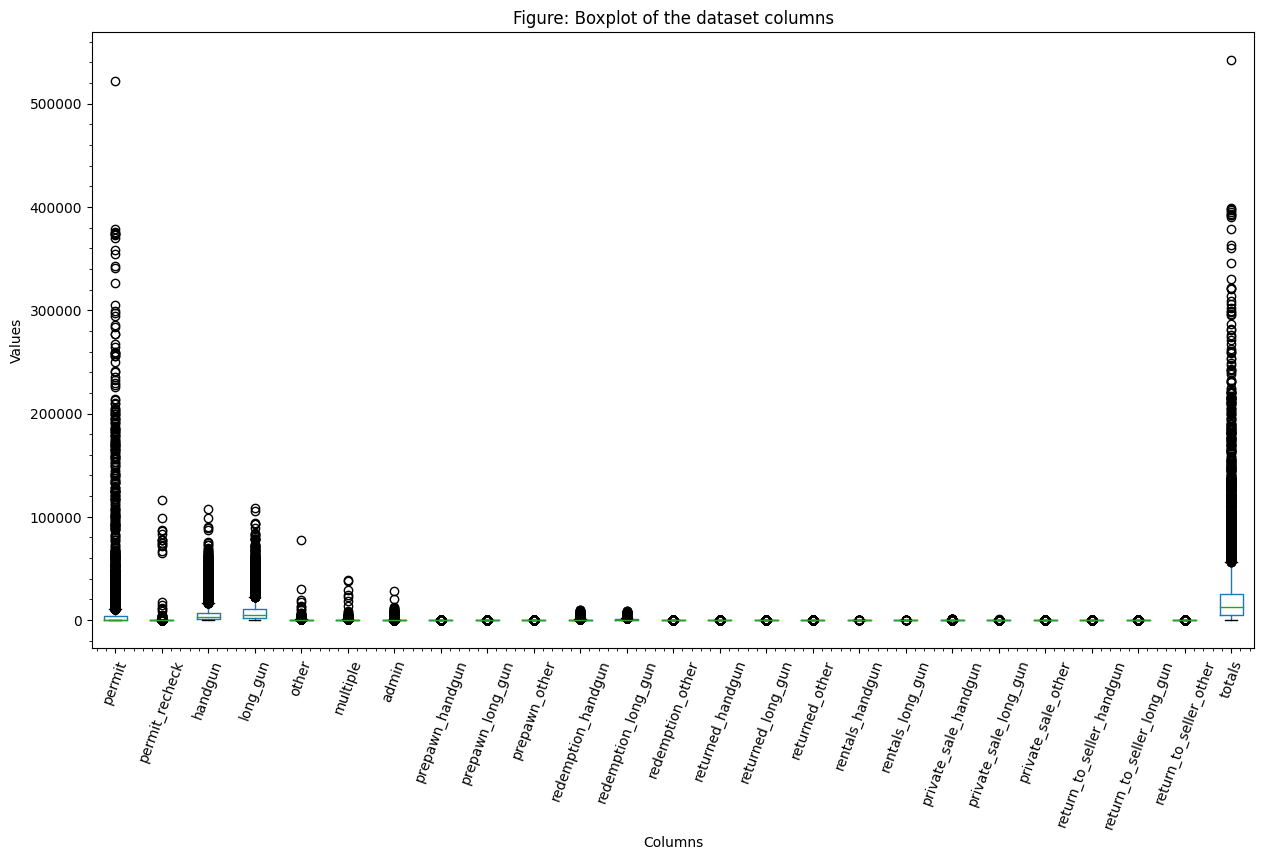

In [19]:
visualize_outliers(guns_dataset)

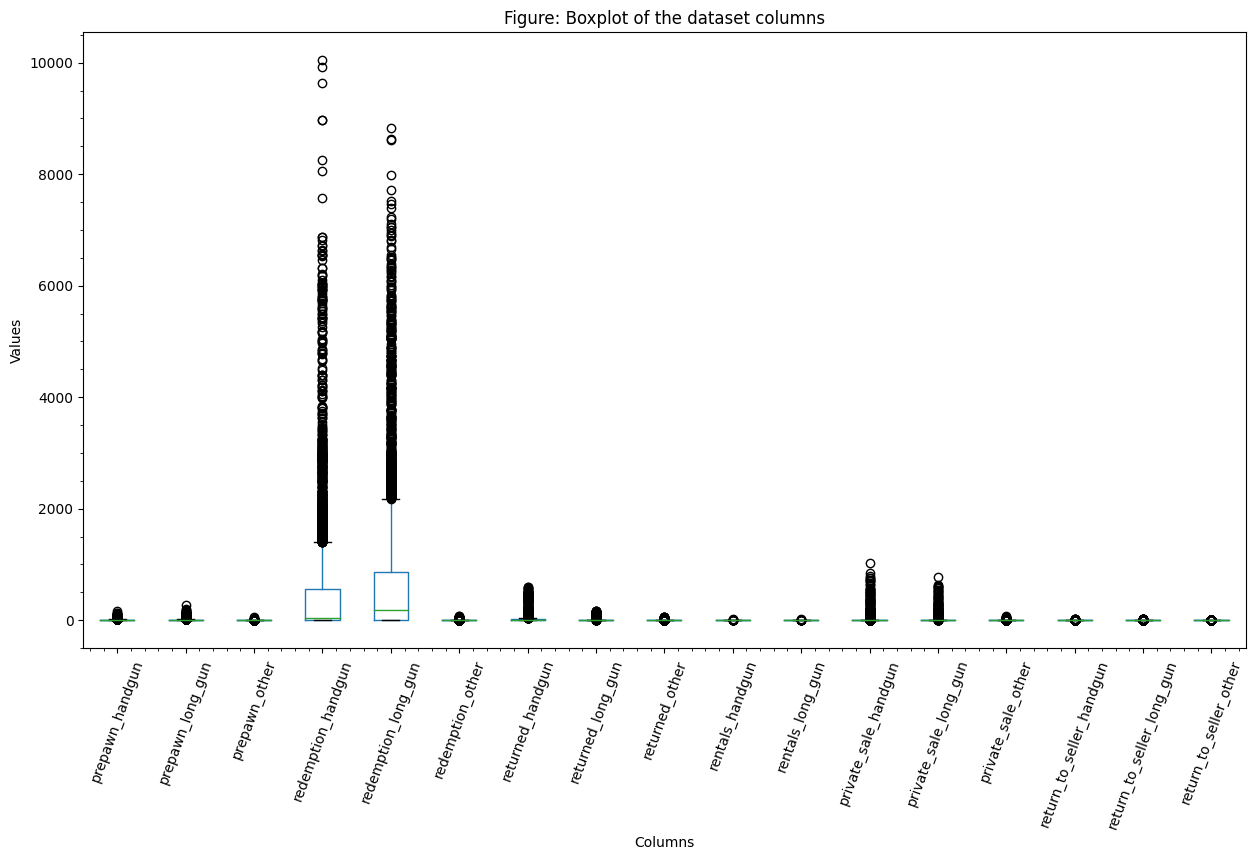

In [20]:
## Taking a closer look at the box plots of these columns to detect the outliers
visualize_outliers(guns_dataset.loc[:,'prepawn_handgun':'return_to_seller_other'])

> It is apparent from the box plots that the gun datasets contains outliers in the columns where the points in black are way more larger than the IQR box. It is also noticed that the outliers are in the larger values, since all the columns have teh minimum values of 0. All of the columns of the datset of guns have numerical outliers shown in the box plots. 

##### Census Dataset

In order to detect outliers the dataset numerical data are converted, some of the column contains percetnages like this 1.40% and some contains omney like this $41,371:

In [21]:
def to_numeric(value):
    """
    This function converts the columns of the census into numerical values,
    with considering the '%' and ',' between numbers and finally the '%'
    Args:
        value (str): the value to be converted
    Returns:
        numerical values of the given value
    """
    value = value.replace(',', '')
   
    if '%' in value:
        value = value.replace('%', '')  ## handle percentage values
        return pd.to_numeric(value, errors='coerce') / 100 ## convert to decimal
    value = value.replace('$', '')
    return pd.to_numeric(value, errors='coerce')

In [22]:
for col in census_dataset.iloc[:, 2:].columns: # iloc the numerical columns
    census_dataset[col] = census_dataset[col].astype(str).apply(to_numeric)

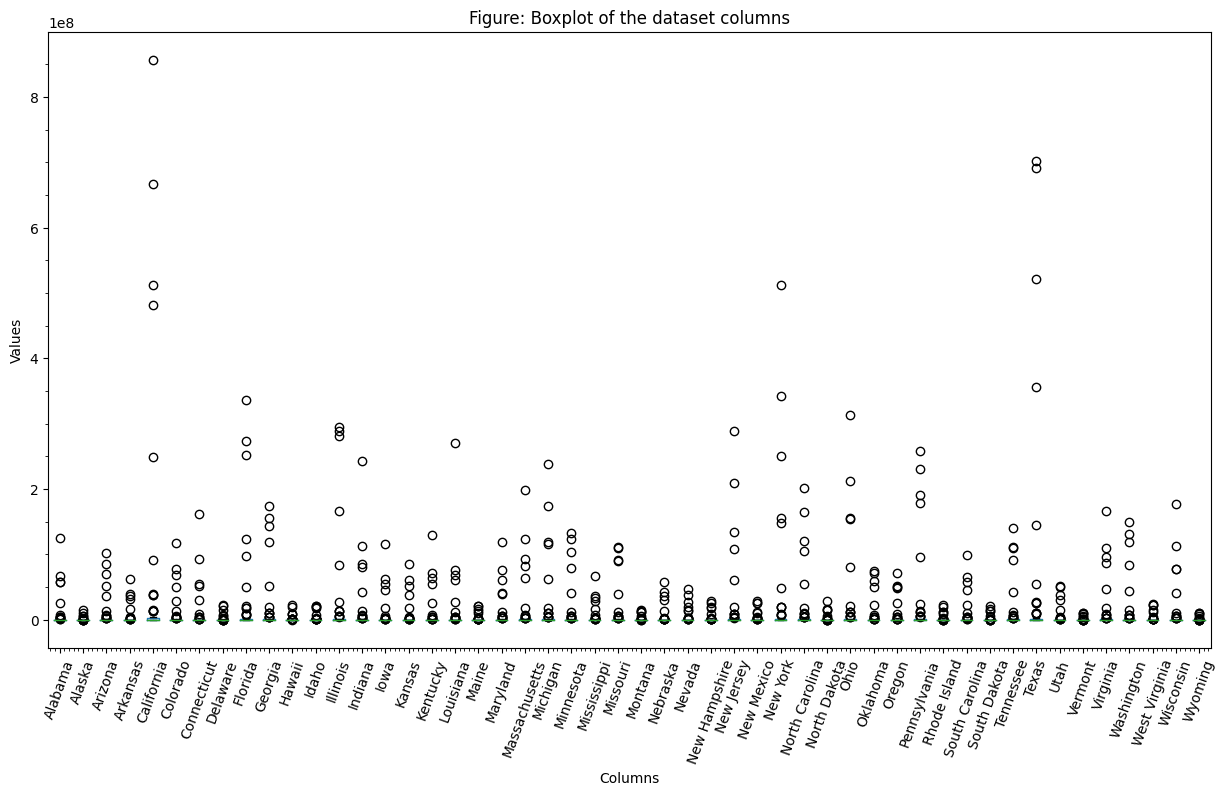

In [23]:
visualize_outliers(census_dataset)

> It is notcied that all of the census dataset columns have numerical outliers. 

#### **Inconsistency or Biased distributions detection:**

- The following states are not in the second dataset, but in the first one:

In [24]:
unmatched_states = list(set(dfs[0]['state'].unique()) - set(dfs[1].columns[2:]))
unmatched_states

['Mariana Islands',
 'District of Columbia',
 'Puerto Rico',
 'Guam',
 'Virgin Islands']

- The census dataset has two coulmns that have some information they could be used later on. However they seem to be very messy, here is an example of both:

In [25]:
print("#### Fact Column spliting examples: ####")
for i in range(5):
    if not isinstance(dfs[1]['Fact'][i], float):
        print(dfs[1]['Fact'][i].split(',')) 
        
print("\n#### Fact Note Column spliting examples: ####")
for i in range(5):
    print(str(dfs[1]['Fact Note'].iloc[-i]).split(',')) ## looked from the tail hence the -i because the first rows were nan

#### Fact Column spliting examples: ####
['Population estimates', ' July 1', ' 2016', '  (V2016)']
['Population estimates base', ' April 1', ' 2010', '  (V2016)']
['Population', ' percent change - April 1', ' 2010 (estimates base) to July 1', ' 2016', '  (V2016)']
['Population', ' Census', ' April 1', ' 2010']
['Persons under 5 years', ' percent', ' July 1', ' 2016', '  (V2016)']

#### Fact Note Column spliting examples: ####
['nan']
['Value greater than zero but less than half unit of measure shown']
['Not applicable']
['Suppressed; does not meet publication standards']
['Not available']


> It is noticed that the Fact column has information both the Fact and the Fact Note. In the next section, the info will be extracted from them.

- Distributions: since there are outliers the histogram visualization that are shown here will not neccerally refelect on the distribution of the data. Instead in the next section after the outliers are handled properly.

Census dataset

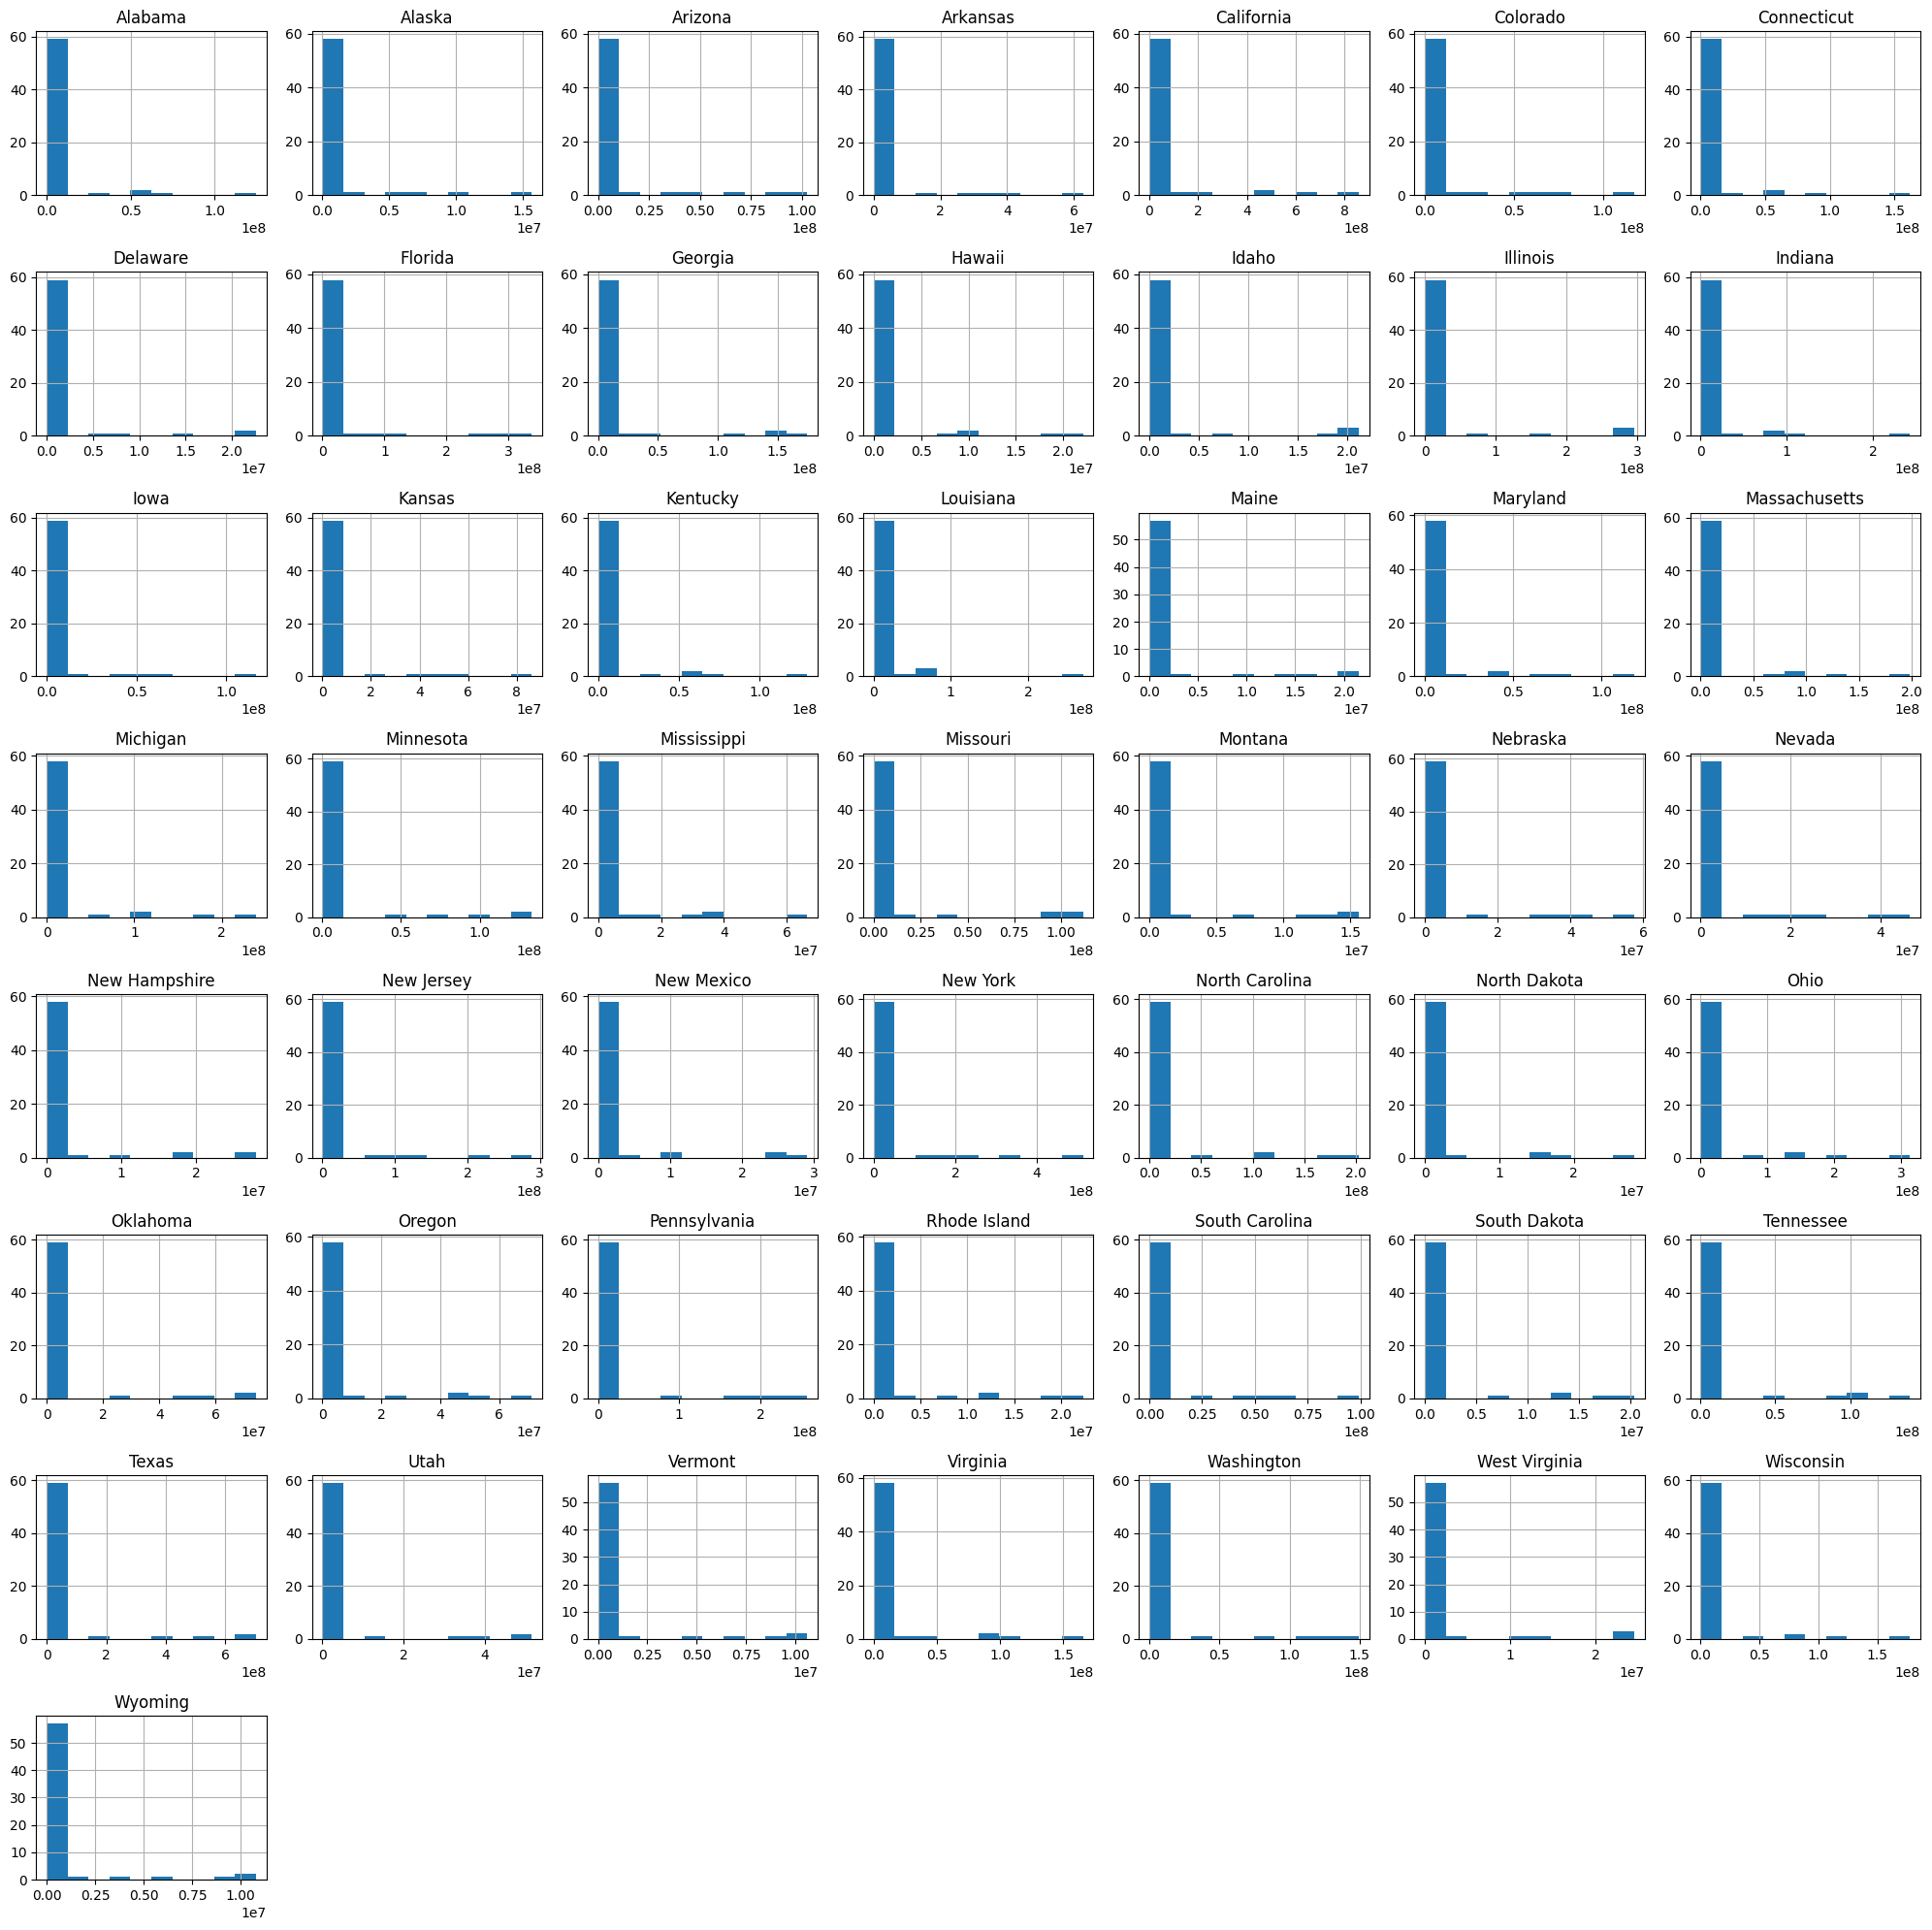

In [26]:
census_dataset.hist(figsize=(20,20));
plt.tight_layout()
plt.show()

> It is observed that the values are skewed to the right, seems that most of the values are zeros. Given that the data isn't cleaned yet this is not the actual distribution.

Guns dataset

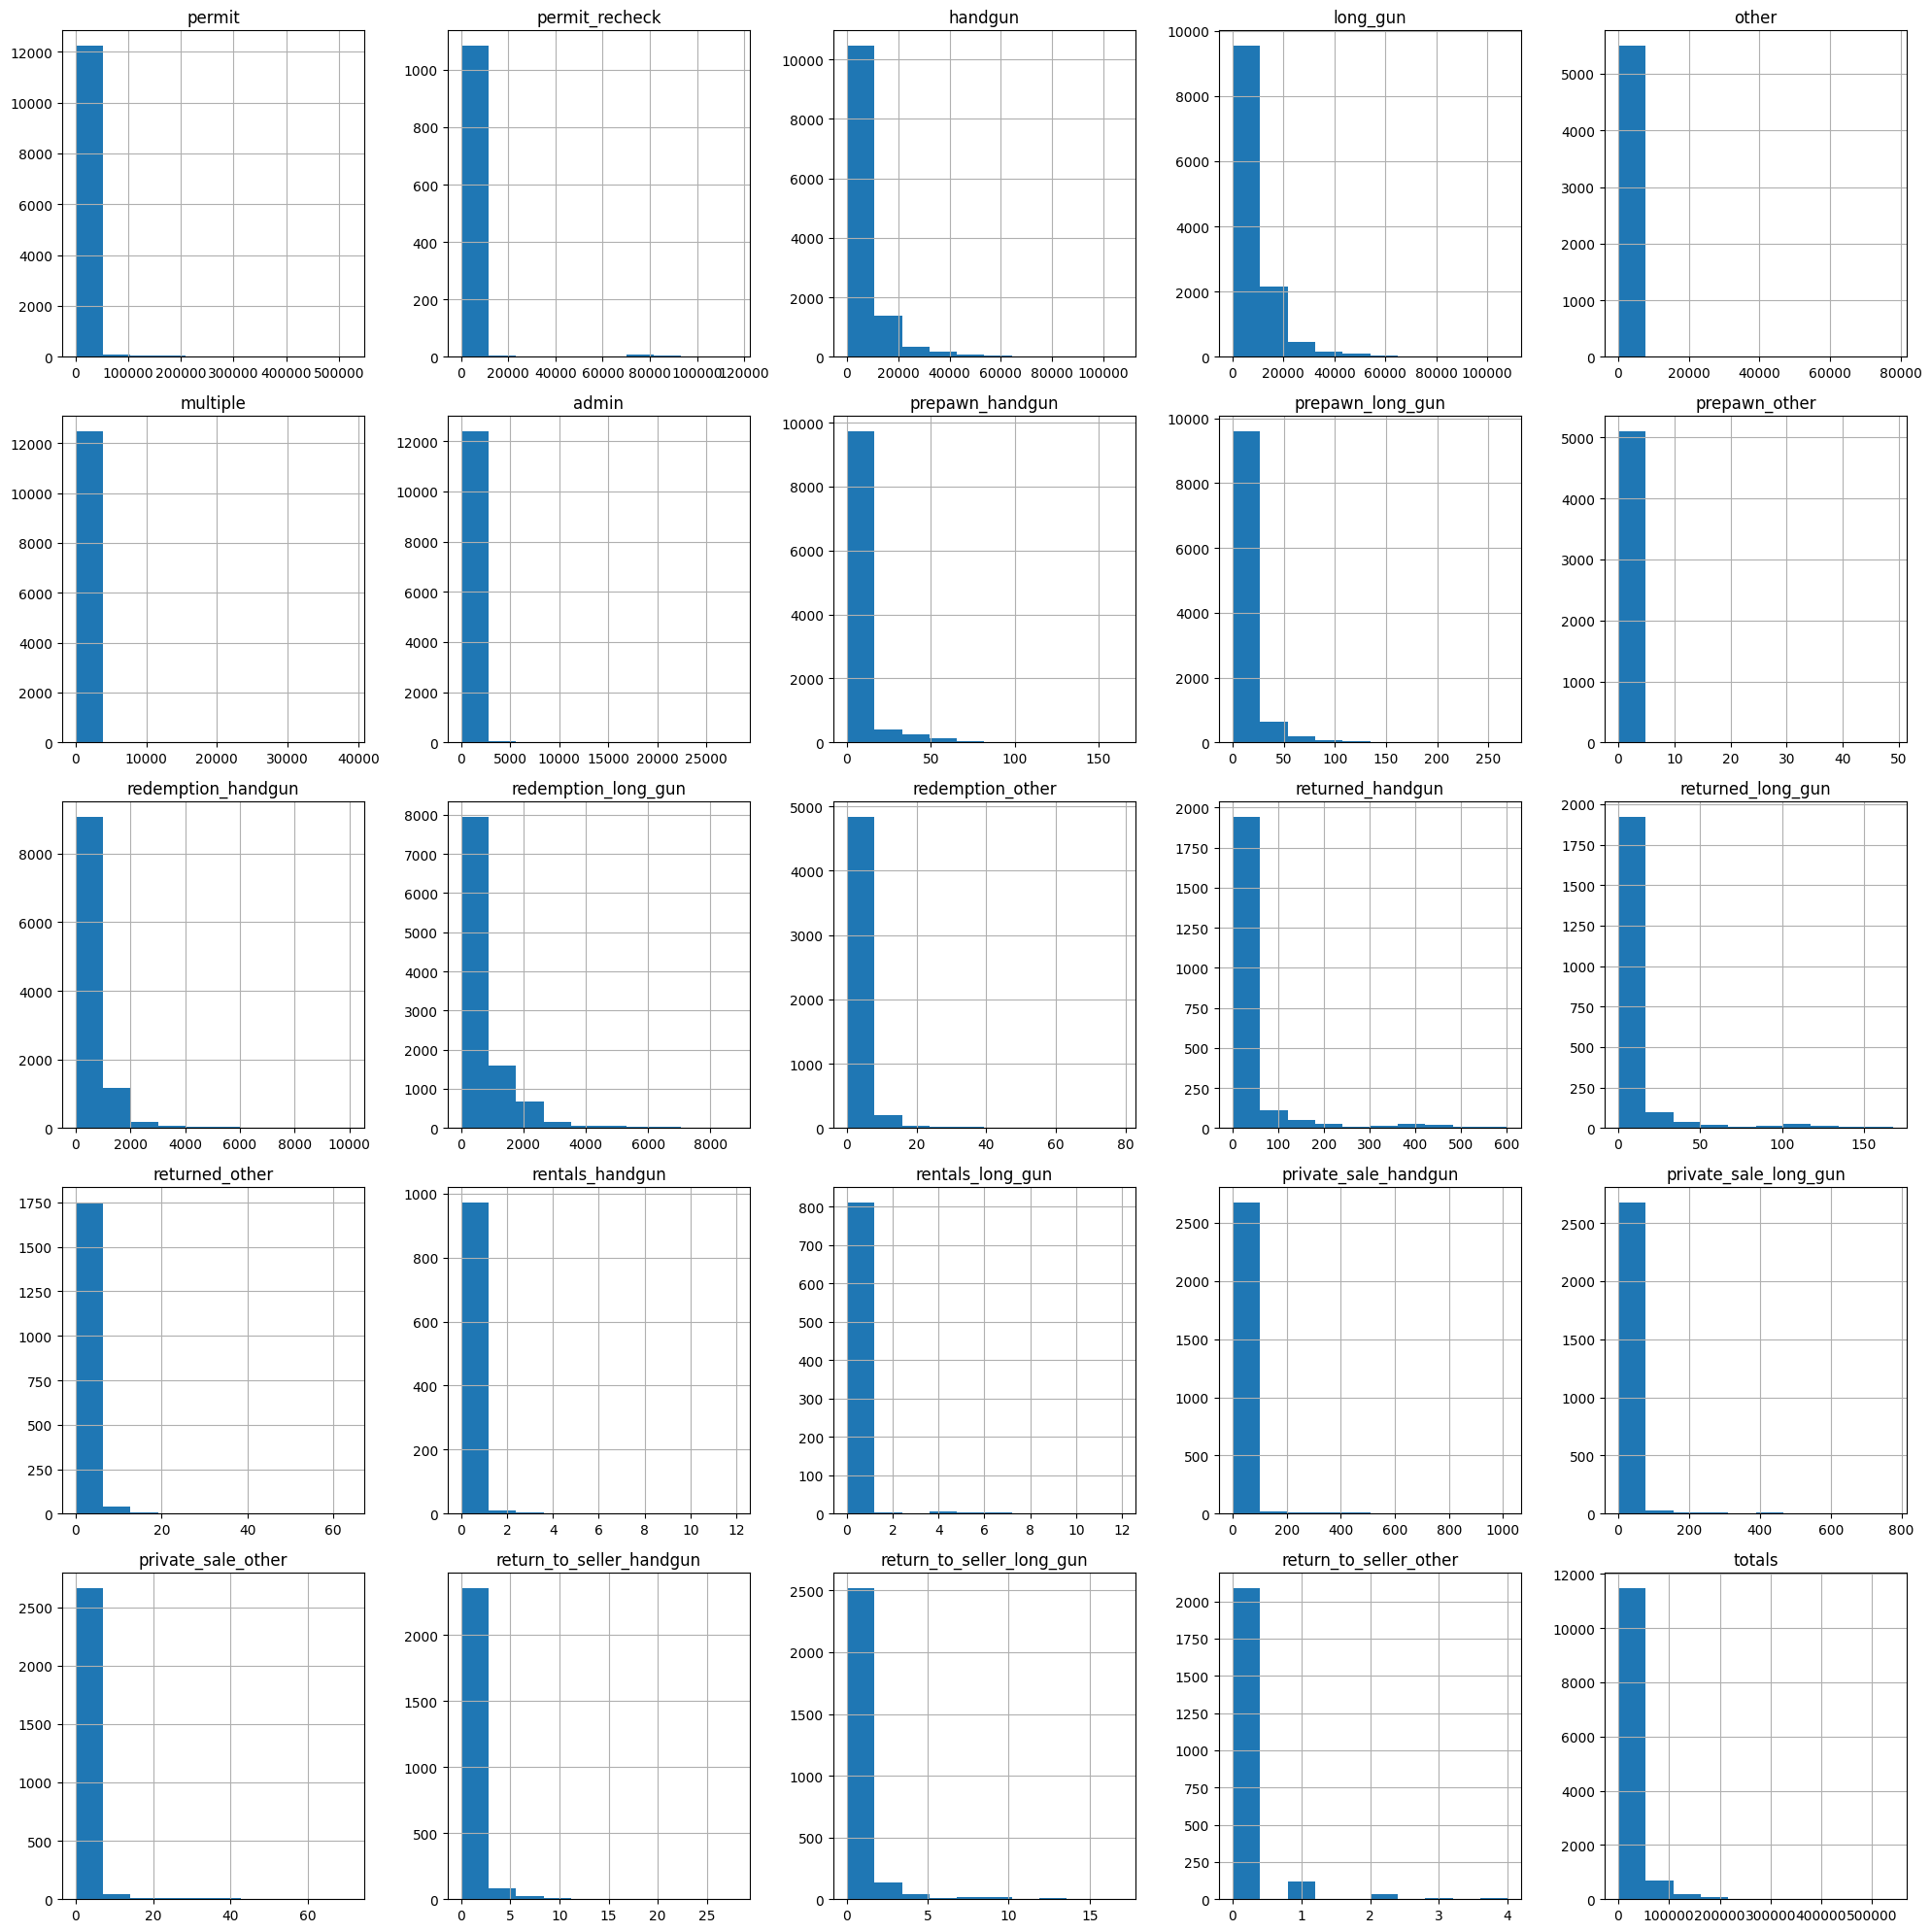

In [27]:
guns_dataset.hist(figsize=(20,20));
plt.tight_layout()
plt.show()

> It is observed that the most of the values are skewed to the right, since again the dataset isn't cleaned so probably the most of that have the values of zeros are to be handled and the distribution will be looked into again after the cleaning section..

### Data Cleaning
In the previous section, the structure of the data and any problems that needed to be handeled were discussed and detected. In this sections, decisions are made about how to handle these problems to finally reach the best output.

#### Mergeing the dataset into one 
Before merging the datasets into one, multiple operations are performed on the datasets such as:
- Handling the dates from both datasets. (lower date cardinality into months and years)
- Extracting information from fact and fact note of the census datasets
- 

For the gun dataset, the following decisions are made, based on the detection that was done from the earlier section of assessment:
- Extract month and year from month column into two and convert to categorical data.
- Drop the states that are mismatched from the census dataset.
- Impute missing values using the Total value. Other values could be impouted from the month before it will see.

Handling Dates in both datasets:

In [28]:
month_names = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

Guns Dataset:

In [29]:
def replace_month(x):
    """
    This function handles the date into two columns months and years
    Args:
        df (pd.DataFrame): specific data type that contains the col month
    Rteurns:
        the modified dataframe with the new columns 
    """    
    if isinstance(x, str):
        return month_names[x]
    else:
        return x

In [30]:
def handle_date_guns(df):
    """
    This function handles the date into two columns months and years
    Args:
        df (pd.DataFrame): specific data type that contains the col month
    Rteurns:
        the modified dataframe with the new columns 
    """    
    if isinstance(df, pd.DataFrame):
        if 'month' in df.columns:
            df['date'] = df['month']
            df['year'] = df['date'].str.split('-').str[0]
            df['month'] = df['date'].str.split('-').str[1]
            df['month'] = df['month'].astype('category')
            df['month'] = df['month'].apply(replace_month)
            df['year'] = df['year'].astype('category')
            df = df.drop('date', axis=1)
            return df
        else:
            print("There is no month column in this dataset")
    else:
        print("TypeError: This is not a pandas DataFrame")

In [31]:
guns_dataset_handle_date  = guns_dataset
guns_dataset_handle_date = handle_date_guns(guns_dataset_handle_date)
guns_dataset_handle_date.head().T

,0,1,2,3,4
month,September,September,September,September,September
state,Alabama,Alaska,Arizona,Arkansas,California
permit,16717.0,209.0,5069.0,2935.0,57839.0
permit_recheck,0.0,2.0,382.0,632.0,0.0
handgun,5734.0,2320.0,11063.0,4347.0,37165.0
long_gun,6320.0,2930.0,7946.0,6063.0,24581.0
other,221.0,219.0,920.0,165.0,2984.0
multiple,317,160,631,366,0
admin,0.0,0.0,0.0,51.0,0.0
prepawn_handgun,15.0,5.0,13.0,12.0,0.0


> The months and years for the guns datasets are handled 

- Guns datasets timeline:

In [32]:
guns_years = set(guns_dataset_handle_date['year'].sort_values())
print("Years of the guns dataset: ", guns_years)
guns_months = set(guns_dataset_handle_date['month'].sort_values())
print("Months of the guns dataset: ", guns_months)

Years of the guns dataset:  {'2005', '2000', '2004', '2006', '2011', '2008', '1998', '2015', '2007', '2009', '2012', '1999', '2014', '2016', '2017', '2010', '2001', '2002', '2003', '2013'}
Months of the guns dataset:  {'March', 'July', 'February', 'April', 'September', 'October', 'August', 'January', 'May', 'December', 'November', 'June'}


> The datset of the guns records is collected in the follwing timeline:
From the year 1998 - 2017 across all the months of the years. Let's focus on 2016.

In [33]:
guns_dataset_2016 = guns_dataset_handle_date.loc[guns_dataset_handle_date['year'] == '2016']
guns_dataset_2016.drop('year', axis=1, inplace=True)
guns_dataset_2016.head()

/tmp/ipykernel_19/4012514108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guns_dataset_2016.drop('year', axis=1, inplace=True)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
495,December,Alabama,26996.0,0.0,13733.0,17519.0,376.0,533,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,62014
496,December,Alaska,254.0,0.0,4087.0,3698.0,243.0,191,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8786
497,December,Arizona,8900.0,121.0,18024.0,13785.0,1180.0,703,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44887
498,December,Arkansas,3294.0,692.0,9192.0,13433.0,277.0,385,37.0,4.0,...,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,29926
499,December,California,61808.0,0.0,63649.0,93224.0,77929.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298161


Census dataset Date info.:

In [34]:
def extract_date_info(fact):
    """
    This function is extracting the date info from a column called fact
    Args:
        fact (str): Pandas dataframe column string values
    Returns:
        the extracted years or months in lists
        or empty lists
    """
    if isinstance(fact, str):
        ## using regualr expressions to try to extract some info from this messy data
        year_pattern = re.compile(r'\b(19\d{2}|20\d{2})\b')
        month_pattern = re.compile(r'\b(January|February|March|April|May|June|July|August|September|October|November|December)\b', re.IGNORECASE)
        
        years = year_pattern.findall(fact)
        months = month_pattern.findall(fact)
        
        return years, months
    return [], []

In [35]:
census_dataset_handle_date = census_dataset
census_dataset_handle_date['year'], census_dataset_handle_date['month'] = zip(*census_dataset_handle_date['Fact'].apply(extract_date_info))

In [36]:
def process_year(year_list):
    """
    A function that handles the years column
    Args:
        year_list(list): the value of the row
    Returns:
        one values instead of a list
    """
    if len(year_list) == 1:
        return str(year_list[0])
    elif len(year_list) == 2:
        return '2011-2015'

In [37]:
census_dataset_handle_date['year'] = census_dataset_handle_date['year'].apply(process_year)
census_years = set(census_dataset_handle_date['year'].sort_values())
print("Years of the census dataset: ", census_years)

Years of the census dataset:  {'2012', '2016', '2015', '2010', '2011-2015', None}


>The census datasets is collected on the years of 2016, 2015, 2012, 2010,  '2011-2015'. For consistency let's only keep the data of 2016.

In [38]:
## Taking the first values of the months list
census_dataset_handle_date['month'] = census_dataset_handle_date['month'].apply(lambda x: x[0] if len(x) > 0 else '')

In [39]:
## Checking which months are on the datasets
census_months = set(census_dataset_handle_date['month'].values)
print("Months of the census dataset: ", census_months)

Months of the census dataset:  {'', 'July', 'April'}


> Let's also focus on the year 2016 census data.

In [40]:
census_dataset_2016 = census_dataset_handle_date.loc[census_dataset_handle_date['year'] == '2016']
census_dataset_2016.drop('year', axis=1, inplace=True)
census_dataset_2016.head()

/tmp/ipykernel_19/2229912051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_dataset_2016.drop('year', axis=1, inplace=True)


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,month
0,"Population estimates, July 1, 2016, (V2016)",NaN,4863300.000,741894.000,6931071.000,2988248.000,3.925002e+07,5540545.000,3576452.000,952065.000,...,6651194.000,2.786260e+07,3051217.000,624594.000,8411808.000,7288000.000,1831102.000,5778708.000,585501.000,July
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,0.060,0.073,0.063,0.064,6.300000e-02,0.061,0.052,0.058,...,0.061,7.200000e-02,0.083,0.049,0.061,0.062,0.055,0.058,0.065,July
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,0.226,0.252,0.235,0.236,2.320000e-01,0.228,0.211,0.215,...,0.226,2.620000e-01,0.302,0.190,0.222,0.224,0.205,0.223,0.237,July
8,"Persons 65 years and over, percent, July 1, 2...",NaN,0.161,0.104,0.169,0.163,1.360000e-01,0.134,0.161,0.175,...,0.157,1.200000e-01,0.105,0.181,0.146,0.148,0.188,0.161,0.150,July
10,"Female persons, percent, July 1, 2016, (V2016)",NaN,0.516,0.477,0.503,0.509,5.030000e-01,0.497,0.512,0.516,...,0.512,5.040000e-01,0.497,0.506,0.508,0.500,0.505,0.503,0.489,July


> The census Datset has been collected on only the months of July and April. 

- Extracting other information from the census dataset:

In [41]:
def extract_demographics(fact):
    """
    This function is used to extract statistics or demographics from the fact comlums
    whcih is the first info in tht fact column
    Args:
        fact(str): row in the Fact columns
    Returns:
        extracted list of demographics and statics types
    """
    demographics = []
    if isinstance(fact, str):
        demographics.append(fact.split(',')[0])
    
    return demographics

In [42]:
census_dataset_2016['Statics_Type'] = census_dataset_2016['Fact'].apply(extract_demographics)
census_dataset_2016['Statics_Type'] = census_dataset_2016['Statics_Type'].apply(lambda x: x[0] if len(x) > 0 else '')
## the statics type could have had multiple choices so the choice is to take the first one only

/tmp/ipykernel_19/809776913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_dataset_2016['Statics_Type'] = census_dataset_2016['Fact'].apply(extract_demographics)
/tmp/ipykernel_19/809776913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_dataset_2016['Statics_Type'] = census_dataset_2016['Statics_Type'].apply(lambda x: x[0] if len(x) > 0 else '')


In [43]:
census_dataset_extraxted = census_dataset_2016.iloc[:,2:] ## without the fact and the fact not columns
transposed = census_dataset_extraxted.transpose()
transposed.columns = census_dataset_extraxted.iloc[:,-1]
transposed = transposed.reset_index()
transposed.rename(columns={'index':'state'}, inplace=True)
census_dataset_2016 = transposed
census_dataset_2016.head()

Statics_Type,state,Population estimates,Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino,White alone,Housing units,Building permits
0,Alabama,4863300.0,0.06,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,2230185.0,15001.0
1,Alaska,741894.0,0.073,0.252,0.104,0.477,0.661,0.038,0.152,0.063,0.013,0.073,0.07,0.612,310658.0,1503.0
2,Arizona,6931071.0,0.063,0.235,0.169,0.503,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,2961003.0,35578.0
3,Arkansas,2988248.0,0.064,0.236,0.163,0.509,0.794,0.157,0.01,0.016,0.003,0.02,0.073,0.729,1354762.0,9474.0
4,California,39250017.0,0.063,0.232,0.136,0.503,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,14060525.0,102350.0


>Now both datsets are joined on State column (innter join), there is yet much to handle in terms of cleaning the dataset:

In [44]:
merged_dataset = pd.merge(census_dataset_2016, guns_dataset_2016, on='state', how='inner')
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 42 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   state                                             600 non-null    object  
 1   Population estimates                              600 non-null    object  
 2   Persons under 5 years                             600 non-null    object  
 3   Persons under 18 years                            600 non-null    object  
 4   Persons 65 years and over                         600 non-null    object  
 5   Female persons                                    600 non-null    object  
 6   White alone                                       600 non-null    object  
 7   Black or African American alone                   600 non-null    object  
 8   American Indian and Alaska Native alone           600 non-null    object  
 9   Asian alon

>Rename columns for consistency, the renaming is done follwing the conventions:

In [45]:
renames = {'Population estimates': 'pop_est',
    'Persons under 5 years': 'under_5',
    'Persons under 18 years': 'under_18',
    'Persons 65 years and over': 'over_65',
    'Female persons': 'female',
    'White alone': 'white_alone',
    'Black or African American alone': 'black_african_american_alone',
    'American Indian and Alaska Native alone': 'aian_alone',
    'Asian alone': 'asian_alone',
    'Native Hawaiian and Other Pacific Islander alone': 'nhpi_alone',
    'Two or More Races': 'two_or_more_races',
    'Hispanic or Latino': 'hispanic_latino',
    'White alone (mentioned above)': 'white_alone', 
    'Housing units': 'housing_units',
    'Building permits': 'building_permits'}

merged_dataset.rename(columns=renames, inplace=True)

> Data Types conversion:

In [46]:
## based on the investigation so far
cols_to_numeric = ['pop_est', 'under_5', 'under_18', 'over_65', 'female', 'white_alone', 'black_african_american_alone', 'aian_alone','asian_alone', 'nhpi_alone', 
'two_or_more_races', 'hispanic_latino', 'white_alone', 'housing_units', 'building_permits']

for col in cols_to_numeric:
    try:
        merged_dataset[col] = pd.to_numeric(merged_dataset[col], errors='coerce')  
    except:
        pass 

In [47]:
## dataframe info after conversion
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   state                         600 non-null    object  
 1   pop_est                       600 non-null    float64 
 2   under_5                       600 non-null    float64 
 3   under_18                      600 non-null    float64 
 4   over_65                       600 non-null    float64 
 5   female                        600 non-null    float64 
 6   white_alone                   600 non-null    object  
 7   black_african_american_alone  600 non-null    float64 
 8   aian_alone                    600 non-null    float64 
 9   asian_alone                   600 non-null    float64 
 10  nhpi_alone                    552 non-null    float64 
 11  two_or_more_races             600 non-null    float64 
 12  hispanic_latino               600 non-null    floa

> Handling the duplicated values, the decision is made to drop these values that are duplicated:

In [48]:
merged_dataset.drop_duplicates(inplace=True)

> Missing values after the merge have became very low, such that the total percentages of the missing values is (3.1666%) the decision is to drop these values.

In [49]:
find_missing_percentage(merged_dataset)

Total of missing percentage (%):  3.166666666666667


state                           0.000000
pop_est                         0.000000
under_5                         0.000000
under_18                        0.000000
over_65                         0.000000
female                          0.000000
white_alone                     0.000000
black_african_american_alone    0.000000
aian_alone                      0.000000
asian_alone                     0.000000
nhpi_alone                      0.190476
two_or_more_races               0.000000
hispanic_latino                 0.000000
white_alone                     0.000000
housing_units                   0.000000
building_permits                0.000000
month                           0.000000
permit                          0.000000
permit_recheck                  0.198413
handgun                         0.000000
long_gun                        0.000000
other                           0.000000
multiple                        0.000000
admin                           0.000000
prepawn_handgun 

In [50]:
merged_dataset.dropna(inplace=True)
merged_dataset.shape

(230, 42)

In [51]:
## After dropping the na, the datset still covers 46 states in 2016
len(set(merged_dataset['state'].values))

46

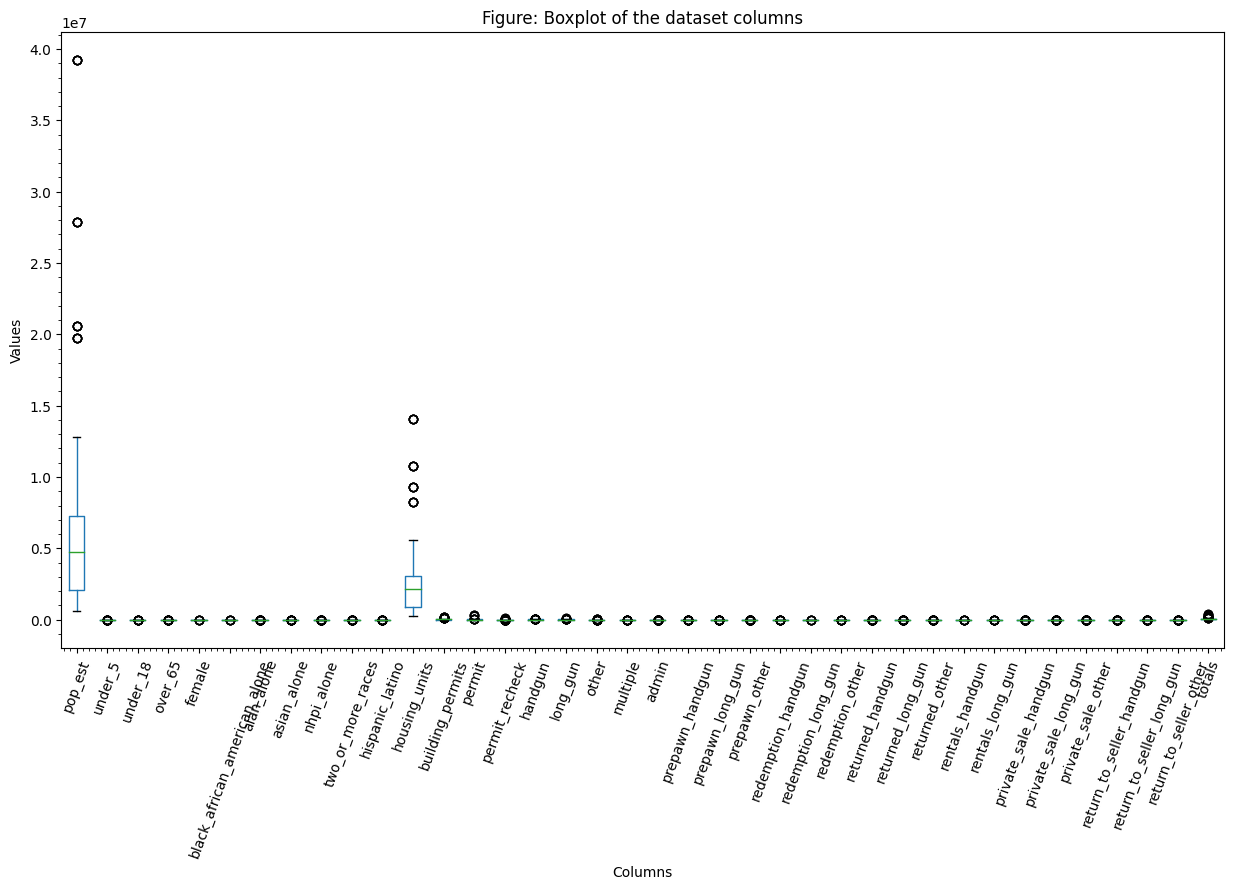

In [52]:
visualize_outliers(merged_dataset)

> These outliers are close to a real factual status, some states have a higher population numbers, some states have consentration of specific ethnicties such as asian, latino, african americans etc. It refelcts the reality. The other outliers are also seem to be valid so the outliers are kept as is.

<a id='eda'></a>
## Exploratory Data Analysis

In this part, a thourow Expolratory Data Analysis is done in order to answer two main questions:

In the two questions, the dependent variable is the totals of the guns permits issued in 2016. Let's take a look at that as a single-variable (1d):

In [53]:
totals = 'totals'

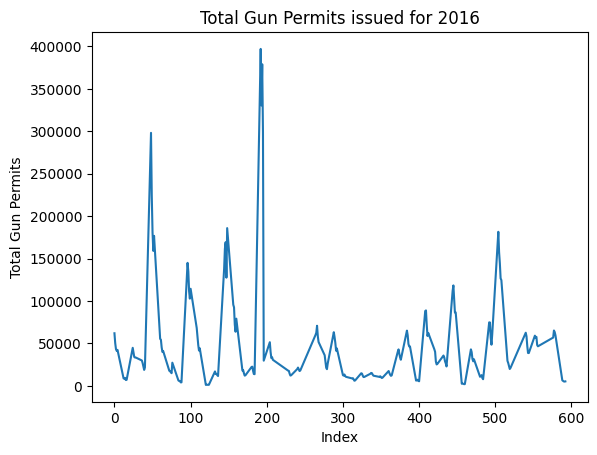

In [54]:
merged_dataset[totals].plot(kind='line')
plt.title('Total Gun Permits issued for 2016')
plt.ylabel('Total Gun Permits')
plt.xlabel('Index');

> The single-variable shown in the line plot has high varaibility, the values varies from 50,000 to 400,000 which is the lowest and the highest values of a total number.

**Multiple-variable (2d) Explorations** are the next two sections

### **Question 1:** Demographic Factors Vs. Total gun permits issued
The first question raised is: **how some demographc factors such as age distrubution, gender and race correlate with the number of gun permits issued in diffrent states specifically is 2016.**

In this question:

The dependnt Variable: 
- totals of gun permits

The independent variables are:
- Age distrubution: Under_15, Under_18, and Over_65 Columns
- Gender: Female
- Race: white_alone, black_african_american_alone, aian_alone, nhpi_alone, two_or_more_races and hispanic_latino.

#### Age

> In this dataset there are three age groups percengates, in the following cell the author is trying to check if the total number of guns goes up by the percetages of each age group on it's own and within all age groups.

In [55]:
age_columns = ['under_5', 'under_18', 'over_65']
age_grouped_v_totals = []

for col in age_columns:
    age_grouped_v_totals.append(merged_dataset.groupby(col)[totals].mean())

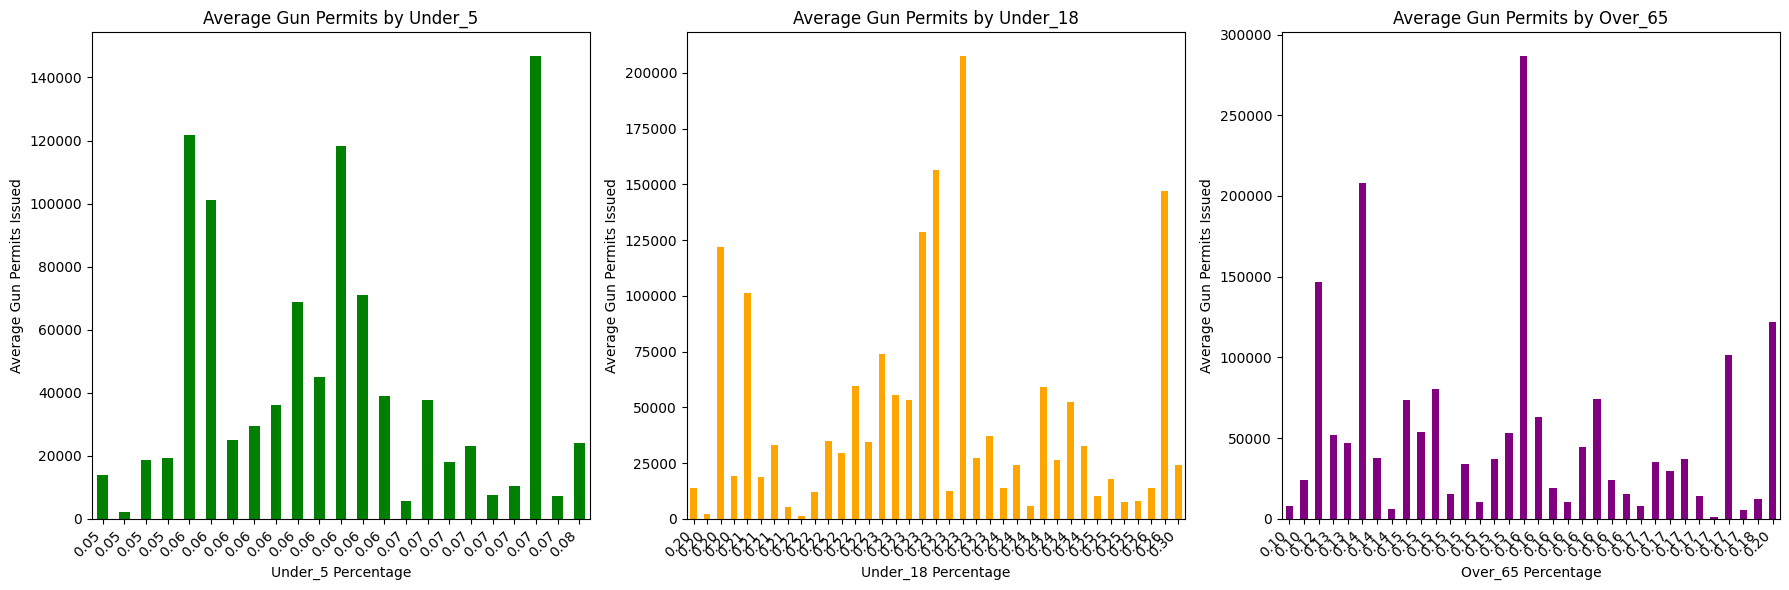

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=len(age_columns), figsize=(18, 6))
colors = ['green', 'orange', 'purple']

for i, col in enumerate(age_columns):
    age_grouped_v_totals[i].plot(kind='bar', ax=axes[i], title=f'Average Gun Permits by {col.capitalize()}', color=colors[i])
    axes[i].set_xlabel(f'{col.capitalize()} Percentage')
    axes[i].set_ylabel('Average Gun Permits Issued')
    labels = [f'{x:.2f}' for x in age_grouped_v_totals[i].index]
    axes[i].set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

> Please note that the x-labels are rounded to the two digits

> These plots are showing how the total number of gun permits average correlates with the percentages of the three age groups of the populations across diffrent states. While the lowest percentages of each of the three age groups has the lowest number of gun permits, the highest percentages of each of the three age groups doesn't have the highest number of gun permits. That is there seem to be no correlation between the total number of gun permits in a states and the percentage of the age groups there. 

In [57]:
## let's print the linear correlation between the target and eacj of age groups
for col in age_columns:
    print(merged_dataset[col].corr(merged_dataset[totals]))

-0.04839561654847219
-0.0058596470723107225
-0.0655549894756587


> There is negative weak correlation between all of the age groups and the total number of gun permits in the states.

### Gender

> Let's check if the gender percentage would affect the total numbers of permits in a state.

In [58]:
gender = ['female']
group_gender = merged_dataset.groupby(gender)[totals].mean()

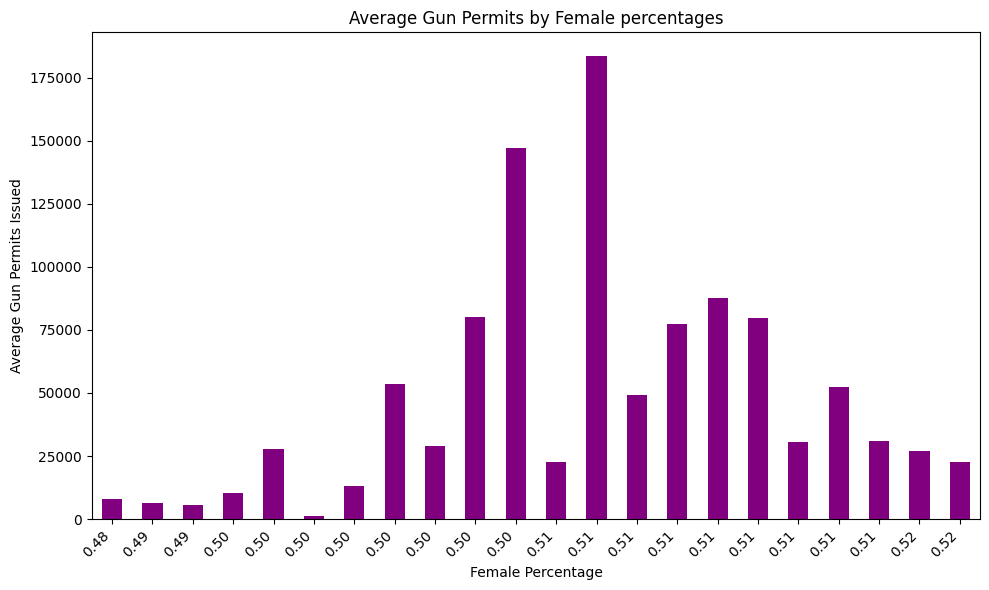

In [59]:
fig, axes = plt.subplots(figsize=(10, 6))
group_gender.plot(kind='bar', ax=axes, title='Average Gun Permits by Female percentages', color='purple')
axes.set_xlabel('Female Percentage')
axes.set_ylabel('Average Gun Permits Issued')
labels = [f'{x:.2f}' for x in group_gender.index]
axes.set_xticklabels(labels,  rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [60]:
merged_dataset['female'].corr(merged_dataset[totals])

0.14557830395753654

> Since the percentages of the females in a population refeclts the reality of being between [0.48-0.52], there is no much diffrence or variablity on the female column as it is actually constant. That is the changes of the avergae gun permits might not reflect a correlation, however when printing the correlation it shows a moderate positive correlation with between these varaibles.

#### Race

In [61]:
race_columns = [ 'black_african_american_alone', 'asian_alone', 'nhpi_alone','two_or_more_races', 'hispanic_latino']
race_grouped_v_totals = []

for col in race_columns:
    race_grouped_v_totals.append(merged_dataset.groupby(col)[totals].mean())

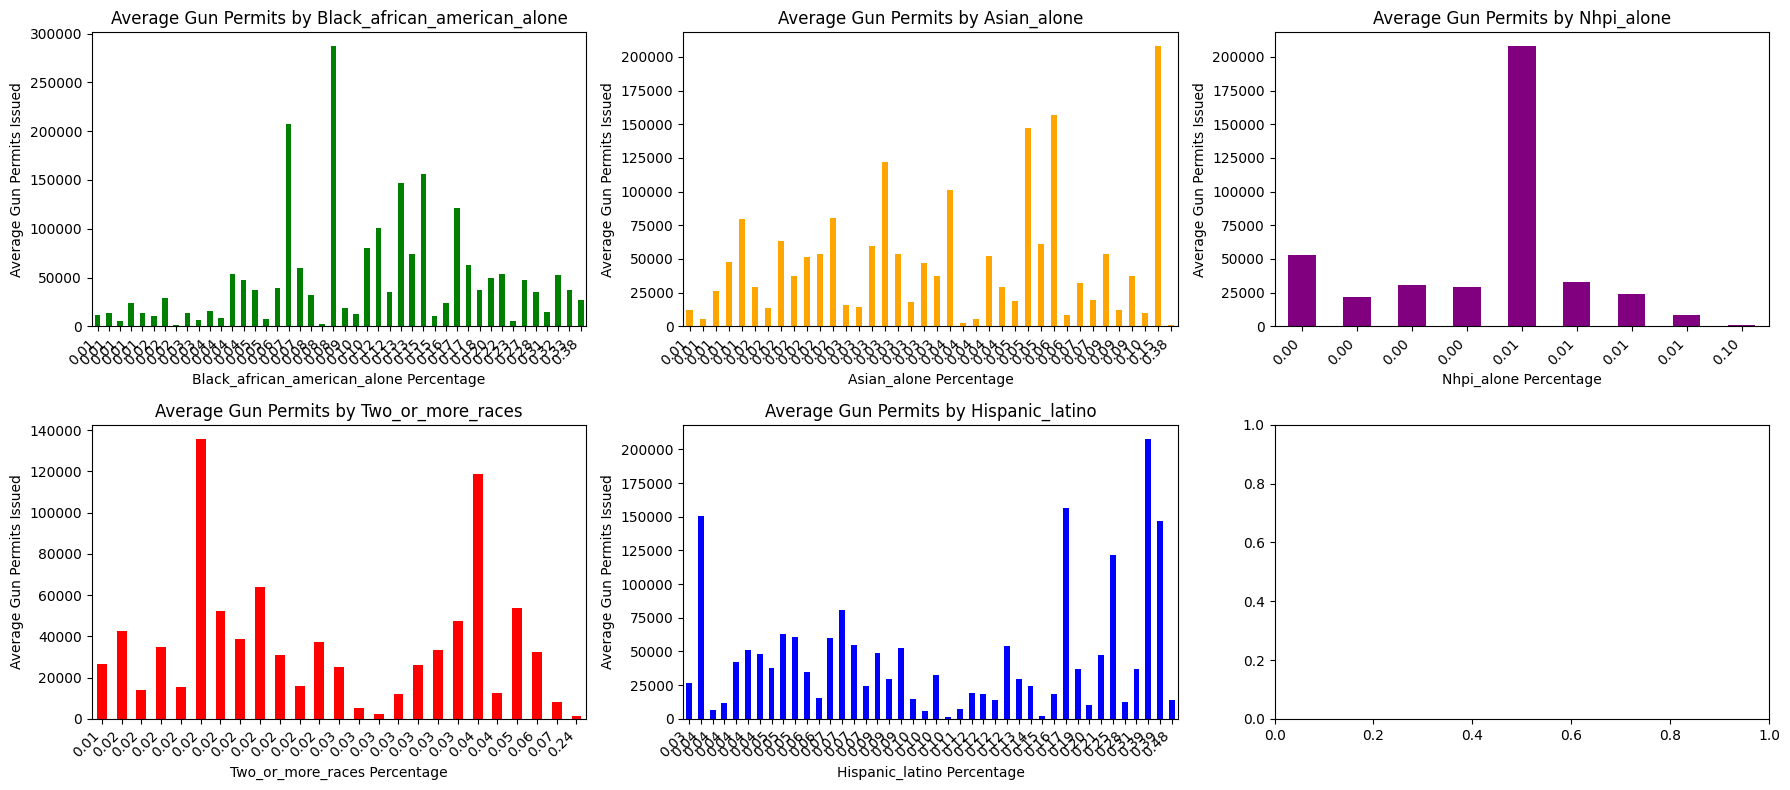

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8)) 
colors = ['green', 'orange', 'purple', 'red', 'blue'] 

for i, col in enumerate(race_columns):
    row_index = i // 3 
    col_index = i % 3   
    race_grouped_v_totals[i].plot(kind='bar', ax=axes[row_index, col_index], 
                                  title=f'Average Gun Permits by {col.capitalize()}', 
                                  color=colors[i])
    axes[row_index, col_index].set_xlabel(f'{col.capitalize()} Percentage')
    axes[row_index, col_index].set_ylabel('Average Gun Permits Issued')
    labels = [f'{x:.2f}' for x in race_grouped_v_totals[i].index]
    axes[row_index, col_index].set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

> Tow or more races shows a bi modal graph. the other graphs seems to be random. Let's investigtae the correlation.

In [63]:
## let's print the linear correlation between the target and eacj of age groups
for col in race_columns:
    print(f"Correlation of {col}: {merged_dataset[col].corr(merged_dataset[totals])}\n")

Correlation of black_african_american_alone: 0.06593864386944152

Correlation of asian_alone: -0.007077417079506806

Correlation of nhpi_alone: -0.1278735092810544

Correlation of two_or_more_races: -0.14680982621590724

Correlation of hispanic_latino: 0.18741691607463032



> It is noticed that there are postive moderate correlation between the higher percentages of hispanic_latino and the number of permits issued. There is also a weak postive correlation with the black_african_american_alone percentages in that state in relation to the number of gun permits issued. Both of the nhpi_alone and the two_or_more_races had moderate negative correlations with the dependent variable. Finally the asian_alone had a very weak negative correlation.

### **Question 2:** Housing, building permits Vs. Total gun permits issued
The second question raised is: **What is the impact of housing and building permits on the total number of gun purchases in diffrent stated in 2016 specifically.**

In this questions:

The Independent Variables are:
- Housing Activity:
    - housing_units
    - building_permits

As for the Dependent Variable:
- totals (total number of gun purchases)

#### Housing Units

In [64]:
housing_units = 'housing_units'
housing_units_groups = merged_dataset.groupby(housing_units)[totals].mean()

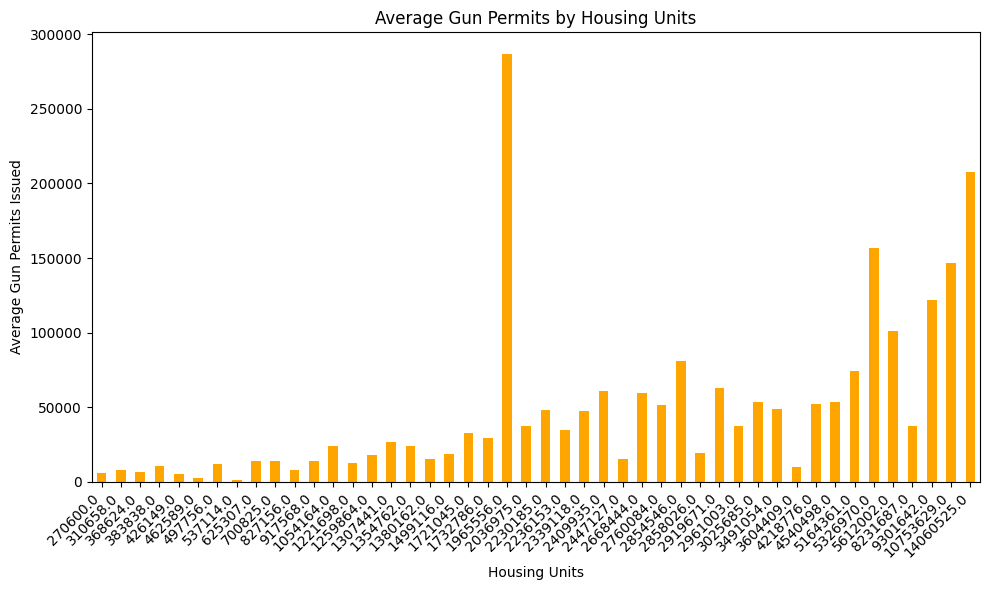

In [65]:
fig, axes = plt.subplots(figsize=(10, 6))
housing_units_groups.plot(kind='bar', ax=axes, title='Average Gun Permits by Housing Units', color='orange')
axes.set_xlabel('Housing Units')
axes.set_ylabel('Average Gun Permits Issued')
labels = [f'{x}' for x in housing_units_groups.index]
axes.set_xticklabels(labels,  rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [66]:
merged_dataset[housing_units].corr(merged_dataset[totals])

0.5994816990046602

> There is positive correlation between the housing units and the total number of gun permits issued it is (0.599).

#### Building Permits

In [67]:
building_permits = 'building_permits'
building_permits_groups = merged_dataset.groupby(building_permits)[totals].mean()

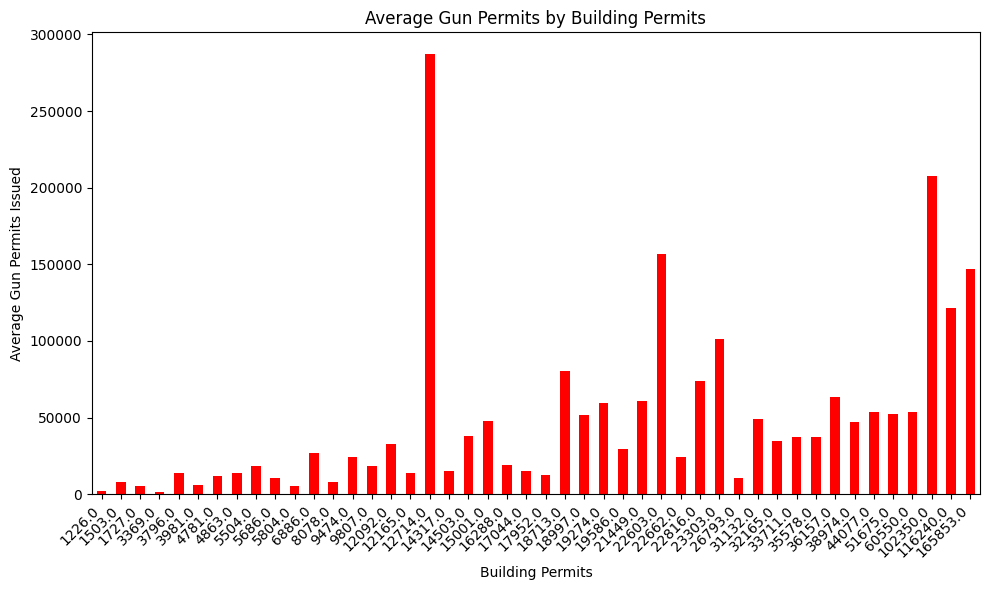

In [68]:
fig, axes = plt.subplots(figsize=(10, 6))
building_permits_groups.plot(kind='bar', ax=axes, title='Average Gun Permits by Building Permits', color='red')
axes.set_xlabel('Building Permits')
axes.set_ylabel('Average Gun Permits Issued')
labels = [f'{x}' for x in building_permits_groups.index]
axes.set_xticklabels(labels,  rotation=45, ha='right')
plt.tight_layout()
plt.show()

> It is noticed that there are variablity in the total number of gun permits against the building permits, in one of the states the total number of the gun permits issued were very high. 

In [69]:
merged_dataset[building_permits].corr(merged_dataset[totals])

0.4958080515452059

> There is another positive correlation between the building permits and the total gun permits issued

### Answers Summary:

Most of the demographic varaibales looked into had low correlation with the dependat variable that is the total number of gun permits issued. However, the second question raised was on spot where the total number of gun permits issued is correlated with the building permits and the building units.

<a id='conclusions'></a>
## Conclusions

In conclusion, two questions were investigated regarding the datasets whether the demographic columns affect the total number of gun permits issued and wether the total number of gun permits issued is affected by housing units or building units. In order to answer these questions, the datasets goes through the data cleansing process including handling outliers, duplicates, and missing values finally fixing the inconsistencies btween the datasets and standarizing it into teh year 2016.

#### **Demographic Factors and Gun Permits**
The first question was answered with the following conclusions:
- A negative weak correlation was observed between all age groups and the total number of gun permits, indicating that as age group percentages increase, the number of permits tends to decrease slightly.

- Initial assumptions suggested that the gender percentage might not significantly affect the total number of permits, given the consistent nature of female population percentages. However, a moderate positive correlation was found between gender percentages and the number of permits, suggesting a potential influence.

- Analysis of racial demographics revealed various correlations:
    - Moderate positive correlations were found between higher percentages of Hispanic/Latino and Black/African American populations and the number of gun permits issued.
    
    - Moderate negative correlations were observed with Native Hawaiian/Pacific Islander and Two or More Races demographics, while Asian populations showed a very weak negative correlation.

#### **Housing and Building Units and Gun Permits**

The second question was answered with the following conclusions:
- A positive correlation of 0.599 was observed between housing units and the total number of gun permits issued, indicating a moderate relationship.
- Variability in total gun permits against building permits was noted across states, with some states showing exceptionally high numbers of permits issued.
- A positive correlation was found between building permits and the total number of gun permits issued.

### Additional Research

As for additional research that could be done on this matter of course, more investigating to what potential causal relationships between demographic factors, housing/building units, and gun permit issuance. 

Since this exploration was done specifically on the year of 2016, a suggestion that could be improved is considering the change over the years and what factors contributed to that change.

### Limitations
Finally, he limitations of this exploration is not being able to generalize the findings stated on the conclusion spcifically that many changes have occured to the context of the uited states builing permits and builing units since after covid-19 (2020). So maybe we could say that this observation could be limited to the year of 2016, not necessarily that these factors causes the change in the permits issued each year.

In [70]:
# convert this notebook to an .html file
!python -m nbconvert --to html Investigatimg_Ncis_and_Census_data.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'Investigatimg_Ncis_and_Census_data.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=Tr